# Exercise 1.7 — Creating Network Visualizations

In this exercise, we’ll use the relationships between countries during the 20th century (extracted in the previous task) to build and analyze a network.  
We’ll visualize connections, detect communities, and analyze centrality measures to understand global relationships in historical context.

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from cdlib import algorithms
import seaborn as sns
import os

# Load country relationship data
df = pd.read_csv('../Data/relationships_countries_20th_century.csv')
print(df.head())
print("Rows:", len(df))


             source            target  value
0           Germany  the Soviet Union     32
1            Europe  the Soviet Union     32
2  the Soviet Union           Germany     32
3  the Soviet Union            Europe     32
4           Germany            France     30
Rows: 9160


In [6]:
# Load the text again
with open('../Data/20th_century.txt', 'r', encoding='utf-8') as file:
    data = file.read().replace('\n', ' ')


In [8]:
G = nx.from_pandas_edgelist(
    df,
    source='source',
    target='target',
    edge_attr='value',
    create_using=nx.Graph()
)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")



Number of nodes: 188
Number of edges: 4580


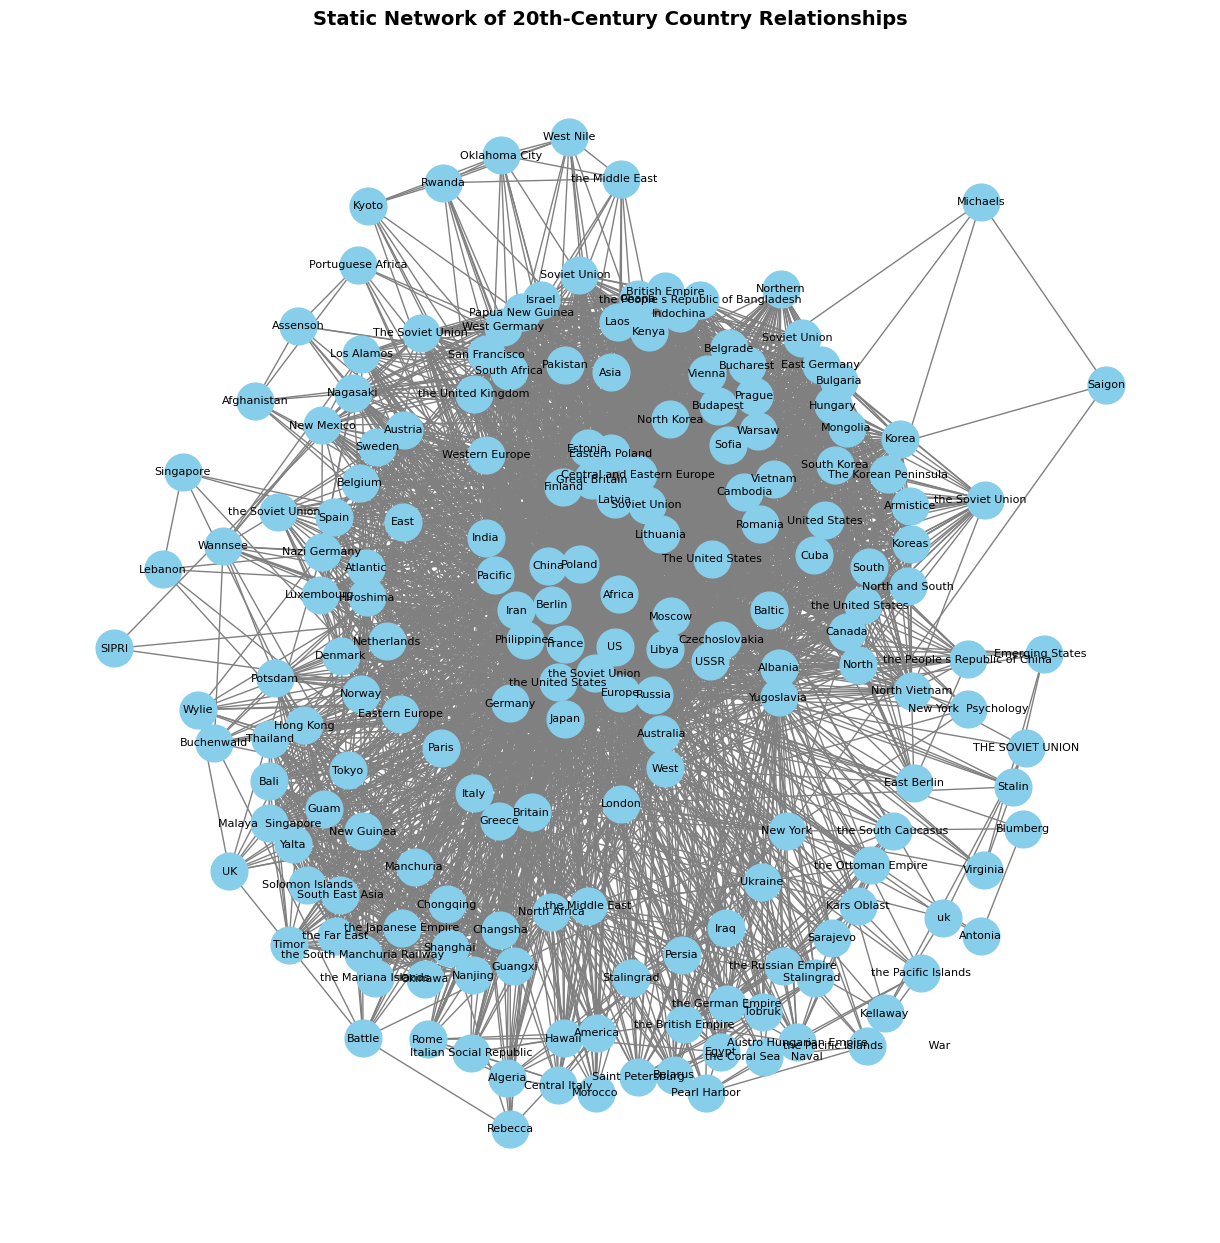

In [9]:
plt.figure(figsize=(12,12))
pos = nx.kamada_kawai_layout(G)
nx.draw(
    G, pos,
    with_labels=True,
    node_color='skyblue',
    edge_color='gray',
    node_size=700,
    font_size=8
)
plt.title("Static Network of 20th-Century Country Relationships", fontsize=14, weight='bold')
plt.savefig('../Img/Screenshots/static_network_20th_century.png', dpi=300, bbox_inches='tight')
plt.show()



In [4]:
# importing needed libraries
import pandas as pd
import networkx as nx

# loading the relationships data
df = pd.read_csv('../Data/relationships_countries_20th_century.csv')

# creating the network graph from the dataframe
G = nx.from_pandas_edgelist(
    df,
    source='source',
    target='target',
    edge_attr='value',
    create_using=nx.Graph()
)

# quick check of the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 188
Number of edges: 4580


In [5]:
from pyvis.network import Network

# creating the interactive network for the 20th-century relationships
net = Network(
    notebook=True,
    cdn_resources='remote',
    width="1000px",
    height="800px",
    bgcolor="#222222",
    font_color="white"
)

# adding node sizes based on their degree (number of connections)
node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')

# adding the NetworkX graph to Pyvis
net.from_nx(G)

# adjusting layout and physics controls
net.show_buttons(filter_=['physics'])
net.repulsion(node_distance=200, central_gravity=0.2, spring_length=150, damping=0.09)

# saving the HTML output
net.show("../20th_century_network.html")


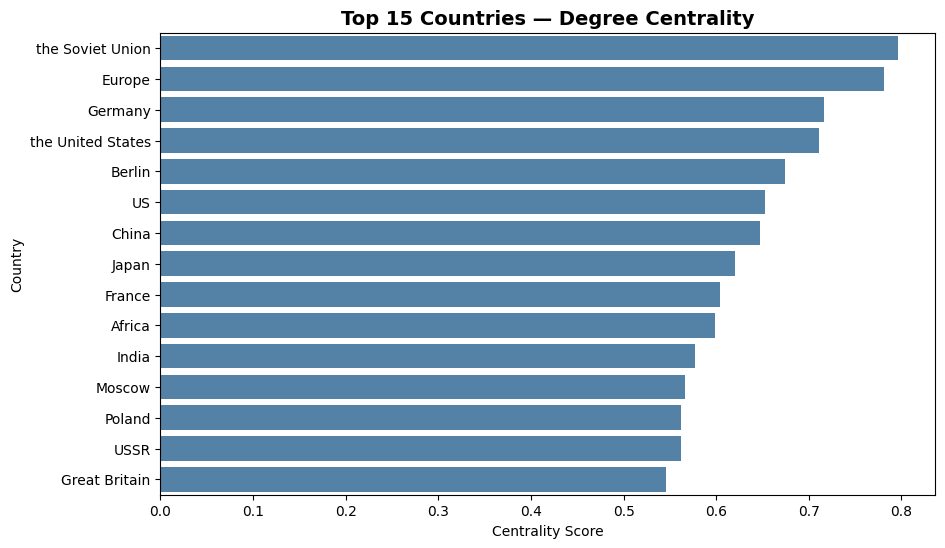

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculating degree centrality
degree_centrality = nx.degree_centrality(G)
deg_df = pd.DataFrame(list(degree_centrality.items()), columns=['Country', 'Degree'])
deg_df = deg_df.sort_values(by='Degree', ascending=False)

# visualizing top 15 countries
plt.figure(figsize=(10,6))
sns.barplot(data=deg_df.head(15), x='Degree', y='Country', color='steelblue')
plt.title("Top 15 Countries — Degree Centrality", fontsize=14, weight='bold')
plt.xlabel("Centrality Score")
plt.ylabel("Country")
plt.savefig('../Img/Screenshots/degree_centrality.png', dpi=300, bbox_inches='tight')
plt.show()


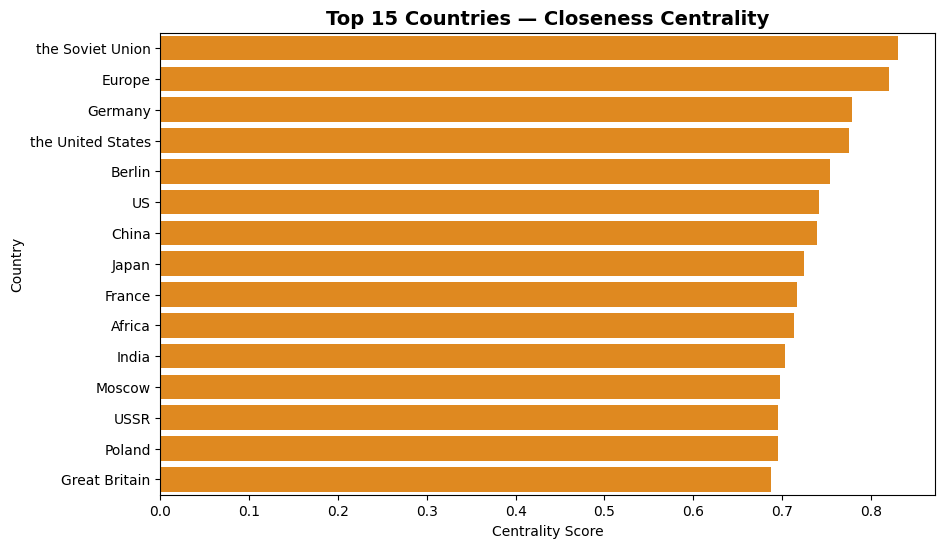

In [7]:
# calculating closeness centrality
closeness_centrality = nx.closeness_centrality(G)
close_df = pd.DataFrame(list(closeness_centrality.items()), columns=['Country', 'Closeness'])
close_df = close_df.sort_values(by='Closeness', ascending=False)

# visualizing top 15 countries
plt.figure(figsize=(10,6))
sns.barplot(data=close_df.head(15), x='Closeness', y='Country', color='darkorange')
plt.title("Top 15 Countries — Closeness Centrality", fontsize=14, weight='bold')
plt.xlabel("Centrality Score")
plt.ylabel("Country")
plt.savefig('../Img/Screenshots/closeness_centrality.png', dpi=300, bbox_inches='tight')
plt.show()


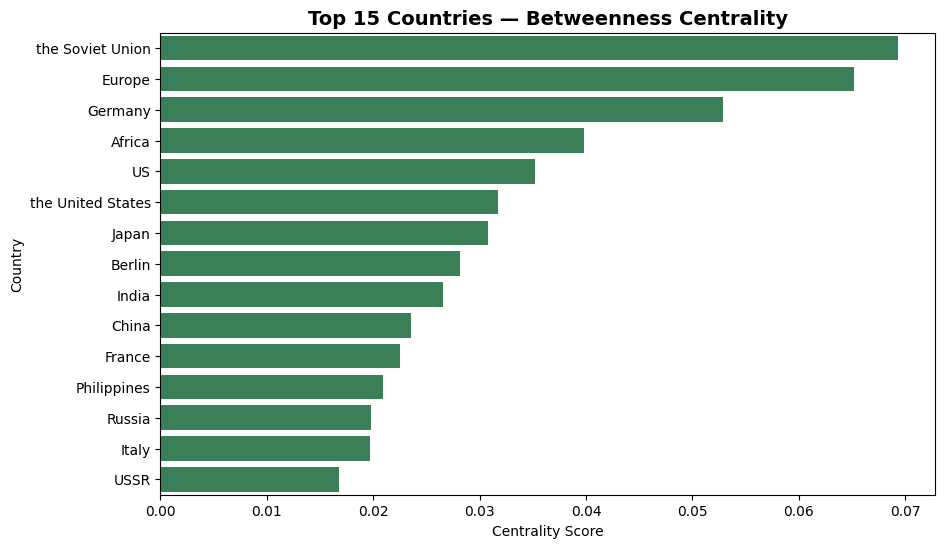

In [8]:
# calculating betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
bet_df = pd.DataFrame(list(betweenness_centrality.items()), columns=['Country', 'Betweenness'])
bet_df = bet_df.sort_values(by='Betweenness', ascending=False)

# visualizing top 15 countries
plt.figure(figsize=(10,6))
sns.barplot(data=bet_df.head(15), x='Betweenness', y='Country', color='seagreen')
plt.title("Top 15 Countries — Betweenness Centrality", fontsize=14, weight='bold')
plt.xlabel("Centrality Score")
plt.ylabel("Country")
plt.savefig('../Img/Screenshots/betweenness_centrality.png', dpi=300, bbox_inches='tight')
plt.show()


### Centrality Analysis Summary

Countries such as **Germany, the United States, and the Soviet Union** consistently appear as the most central nodes across all metrics.  
Their high degree, closeness, and betweenness scores highlight their geopolitical influence during the 20th century.  
These metrics confirm how historical power relations shaped the structure of global interactions during this period.
